# 데이터 집계와 시각화

### 주요 내용

1. 건수, 합계 평균 등 집계값 계산
2. 히스토그램, 상자그림, 막대그래프 등 그래프 작성 
3. 정렬 및 피벗테이블 활용

<br>

### 목표 
1. 집계값을 계산할 수 있다.
2. 적절한 그래프를 작성하고 올바르게 해석할 수 있다.
3. 피벗 테이블 등 다양한 방법으로 집계하고, 결과값을 적절히 정렬할 수 있다. 


<br>
<hr>
<br>

## 예제 및 실습 데이터 불러오기

In [1]:
# 데이터 불러오기
import pandas as pd
df_ins = pd.read_csv('data/insurance.csv')
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df_sp = pd.read_csv('data/StudentsPerformance.csv')
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
#df_sp.describe()
#df_sp.describe(include='number')
#df_sp.describe(include='object')

<br>

## 1. 수치형 변수의 집계값과 히스토그램

하나의 수치형 변수로 합계, 평균과 같은 집계값을 계산할 수 있고 히스토그램으로 분포를 확인


<br>

### 1.1. 수치형 변수의 집계값 계산

수치형 변수를 선택한 다음 sum( ), mean( ) 같은 메서드를 활용해서 단순한 집계값을 계산  
먼저 변수를 선택하고 다양한 집계 함수를 메서드로 활용

In [ ]:
# 관심 변수 선택
df_ins['charges']

In [ ]:
# 수치형 변수의 집계값 계산
    # mean( ) : 수치형 Series의 메서드
df_ins['charges'].mean()

In [ ]:
df_ins['charges'].sum()

In [ ]:
# 분산과 표준편차계산
df_ins['charges'].var(), df_ins['charges'].std()

In [ ]:
# 관측치 수 계산하기
df_ins['charges'].count()

In [ ]:
df_ins.describe()

<br>

### 1.2. 히스토그램 그리기

하나의 수치형변수의 분포를 파악하기 위해서 히스토그램을 활용  
Python에서 그래프를 그릴때는 기본적으로 matplotlib 라이브러리를 활용하지만, 좀 더 가독성이 좋고 그래프가 이쁜 seaborn 라이브러리를 추가로 활용   



<br>

#### 1.2.1. pandas의 메서드와 matplotlib을 활용한 그래프

In [3]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 한글 폰트 설정 (Windows)
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [5]:
# 한글 폰트 설정 (macOS)
# plt.rc('font', family='AppleGothic')
# plt.rc('axes', unicode_minus=False)

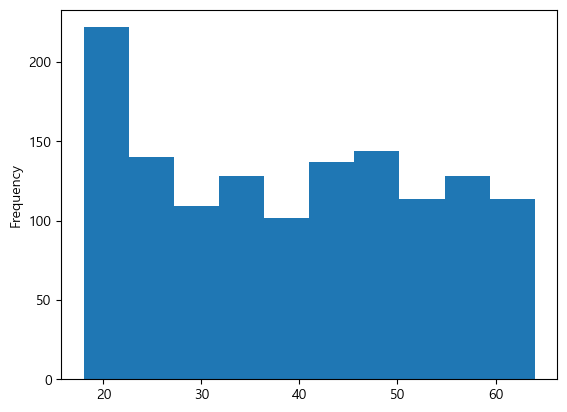

In [6]:
# 가장 간단한 히스토그램과 상자그림
    # DataFrame의 plot 메서드 활용
    # plt.show() : 최종 그래프 출력함수, 생략 가능
df_ins['age'].plot(kind='hist')
plt.show()

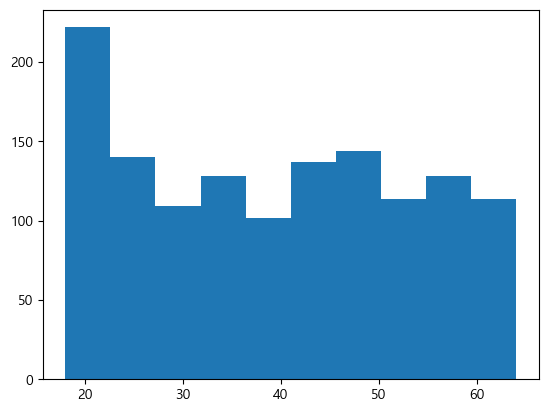

In [7]:
# matplotlib의 hist( )를 활용한 히스토그램 그리기
plt.hist(df_ins['age'])
plt.show()

In [ ]:
# 그래프를 꾸며 다시 그리기
plt.figure(figsize=(18,6)) ##사이즈 정하고

plt.hist(df_ins['age'])
plt.title('나이 히스토그램', fontsize=30)
plt.xlabel('나이', fontsize=20)
plt.ylabel('수', fontsize=20)

plt.show()


<br>

#### 1.2.2. seaborn을 활용한 히스토그램

seaborn 라이브러리를 활용하면 그래프를 그리는 명령어가 좀 더 직관적이고 DataFrame 형식을 활용하기 편함

In [ ]:
# histplot()을 활용한 히스토그램
sns.histplot(data=df_ins,
             x='charges')
plt.show()

<br>

#### [실습] 한 수치형 변수에 대한 요약과 시각화

1. df_sp에서 'math score'의 평균 계산하기

2. df_sp에서 'math score'의 히스토그램을 matplotlib으로 그려기

3. df_sp에서 'math score'의 히스토그램을 seaborn으로 그려기



In [ ]:
sns.histplot(data=df_sp,
             x='math score')

### 1.3. 분위수와 상자그림

`quantile()`을 활용해서 분위수를 계산  

최솟값(minimum, 0%), Q1(1st Quartile, 25%), 중앙값(median, 50%), Q3(3rd Quartile, 75%), 최댓값(maximum, 100%)을 사분위수(quartile)이라고 부르고, **상자그림(boxplot)**으로 시각화

In [ ]:
df_ins['charges'].quantile(0.1)

In [ ]:
df_ins['charges'].quantile([0.0,0.25,0.5,0.75,1.0])
    ## quantile( ) : 계산할 분위(1.0이 최댓값) 를 리스트로 묶기

In [ ]:
# matplotlib의 boxplot()으로 상자그림 그리기
plt.boxplot(df_ins['age'])
plt.show()

In [ ]:
# boxplot( )을 활용한상자그림
sns.boxplot(data=df_ins,
            y='charges')
plt.show()

<br>


#### [실습]

1. df_sp에서 'reading score'의 Q1(25%), 중위수(median, 50%), Q3(75%) 계산하기
2. df_sp에서 'reading score'의 상자그림을 seaborn으로 그리기

<br>

## 2. 범주형 변수의 요약과 시각화  

범주형 변수는 정해진 수준(level) 중에 하나의 값을 갖기 때문에 분석 방법이 단순하며 개수를 세면 됨

<br>


### 2.1. 그룹별 건수 계산과 시각화

> SQL에서도 가장 잦은 키워드 조합이 `SELECT COUNT(1) ... GROUP BY ...`입니다.  

범주형 변수/그룹 변수로 수준별 관측치 수를 셀 수 있고, 막대그래프로 표현


In [ ]:
# 수준(levels) 및 개수 확인 
df_ins['smoker'].unique()

In [ ]:
df_ins['smoker'].nunique()

<br>

#### 2.1.1. 수준별 관측치 수 계산 및 막대그래프 작성

In [ ]:
# 수준별 관측치 수 세기
df_ins['smoker'].value_counts()

In [ ]:
# plot( ) 메서드를 활용한 막대그래프 
df_ins['smoker'].value_counts().plot(kind='bar')

<br>

#### 2.1.2. groupby()와 size()를 활용한 집계와 시각화  

범주형 변수의 집계에서는 *value_counts()*만 활용해도 충분하지만 이후 분석 과정에서 자주 활용할 *groupby()*를 활용한 방법도 활용

In [ ]:
# groupby()와 size( )를 활용한 그룹별 건수 계산
    # 결과는 앞과 동일
df_ins.groupby('smoker').size()

In [ ]:
# plot() 메서드를 활용한 시각화
df_ins.groupby('smoker').size().plot(kind='bar')

<br>

#### 2.1.3. DataFrame 형식의 활용

*groupby()*에 그룹 변수 하나를 지정하면 **Series** 형식으로 출력되어 가독성이 떨어질 수 있음  
`as_index=False` 옵션을 활용해서 집계 결과를 DataFrame 형식으로 바꾸고 시각화에 활용

In [ ]:
# DataFrame 형식으로 바꾸기
    # as_index=False : 그룹 변수를 index로 지정하지 않음
df_agg_smoker = df_ins.groupby('smoker', as_index=False).size()
df_agg_smoker

In [ ]:
# matplotlib의 bar()를 활용한 시각화
plt.bar(df_agg_smoker['smoker'], df_agg_smoker['size'])
plt.show()

In [ ]:
# seaborn의 barplot( )을 활용한 시각화
sns.barplot(data= df_agg_smoker,
            x='smoker',
            y='size')

#### [참고]

seaborn의 countplot( ) 함수를 활용하면, groupby(), size() 없이 원본 데이터에서 바로 막대그래프를 그릴 수도 있음  

In [ ]:
# 집계 없이도 가능한 seaborn 막대그래프
sns.countplot(data=df_ins,
              x='smoker')

#### [실습]

1. 데이터 df_sp에서 'parental level of education'별 관측치 수를 계산하고 matplotlib 막대그래프 그리기
2. 'race/ethnicity'별 관측치 수를 계산해서 DataFrame 형식으로 저장하고, seaborn 막대그래프로 그리기

In [9]:
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

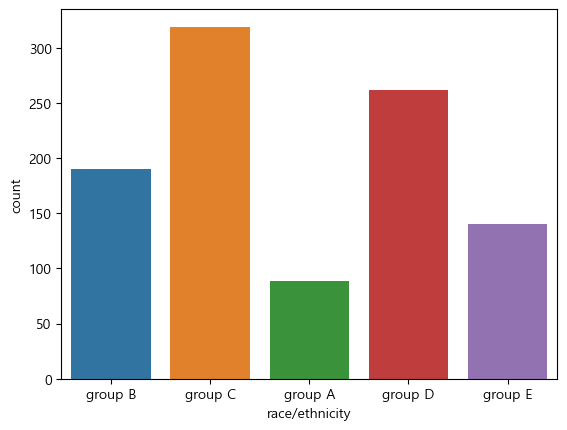

In [10]:
sns.countplot(data=df_sp,
              x='race/ethnicity')

<AxesSubplot:xlabel='race/ethnicity', ylabel='size'>

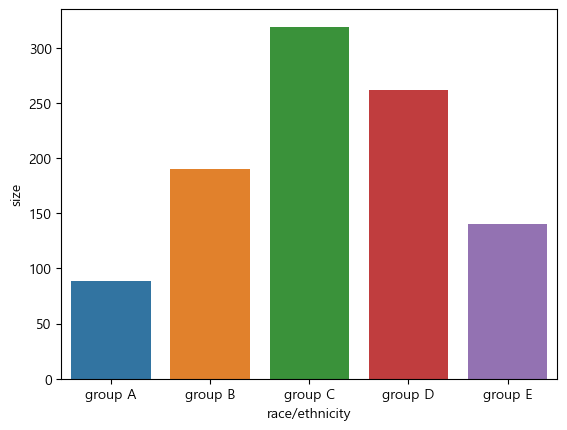

In [12]:
df_race = df_sp.groupby('race/ethnicity', as_index=False).size()

sns.barplot(data= df_race,
            x='race/ethnicity',
            y='size')

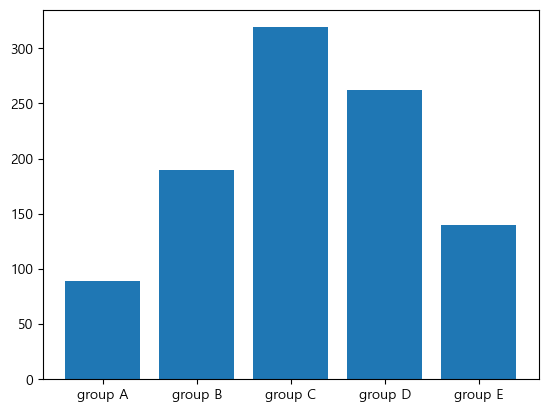

In [13]:
plt.bar(df_race['race/ethnicity'], df_race['size'])
plt.show()

<br>  

## 3. 두 수치형 변수의 관계 

두 수치형 변수의 관계를 파악하기 위해서 **산점도(scatterplot)**를 그리고 **상관계수(correlation coefficient)**를 계산  

In [14]:
# 예제 데이터 불러오기
    # 아빠키와 아들키
df_heights = pd.read_csv('data/heights.csv')
df_heights

,father,son
0,165.223215,151.836806
1,160.657388,160.563662
2,164.986513,160.889747
3,167.011350,159.492645
4,155.288564,163.274070
...,...,...
1073,170.171897,179.710893
1074,181.182797,173.400060
1075,182.329176,176.036961
1076,179.675460,176.027055


In [16]:
# seaborn으로 산점도 그리기
df_heights.describe()

,father,son
count,1078.000000,1078.000000
mean,171.925226,174.457537
std,6.971966,7.149342
min,149.880320,148.607983
25%,167.100847,170.005331
50%,172.127164,174.284183
75%,176.791569,178.983564
max,191.602182,199.046567


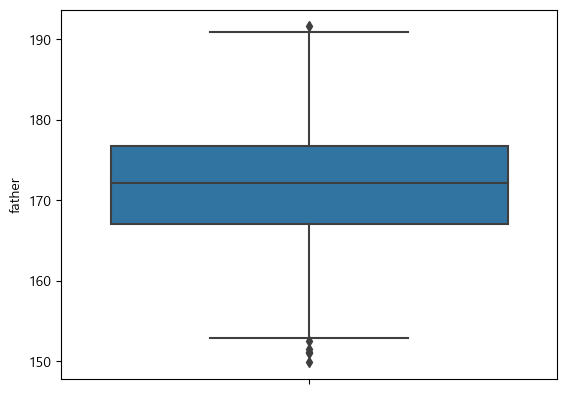

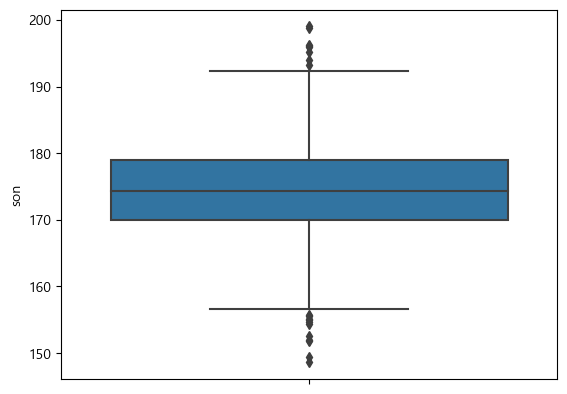

In [30]:
sns.boxplot(data=df_heights,
            y='father')
plt.show()

sns.boxplot(data=df_heights,
            y='son')
plt.show()

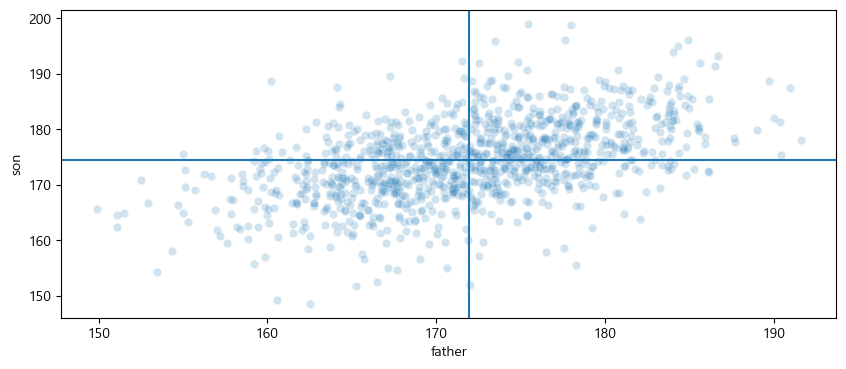

In [23]:
plt.figure(figsize=(10,4))

sns.scatterplot(data=df_heights, 
                x='father', 
                y='son', 
                alpha=0.2)



plt.axhline(mean_s) # 수평선 추가
plt.axvline(mean_f) # 수직선 추가
plt.show()


In [24]:
# 공분산 계산하기
df_heights[['father','son']].cov()

,father,son
father,48.608307,24.989192
son,24.989192,51.113092


In [25]:
# 상관계수 계산하기
df_heights[['father','son']].corr('pearson')

,father,son
father,1.000000,0.501338
son,0.501338,1.000000


#### [실습] 두 수치형 변수의 관계 탐색
 
1. df_sp에서 'math score'와 'reading score'의 산점도를 그리고 상관계수 계산하기
2. df_ins에서 bmi와 charges의 산점도를 그리고 상관계수 계산하기
3. (선택) df_ins에서 groupby('smoker')를 활용해서 bmi와 charges의 상관계수를 smoker별로 나눠 계산하기

66.089 69.169


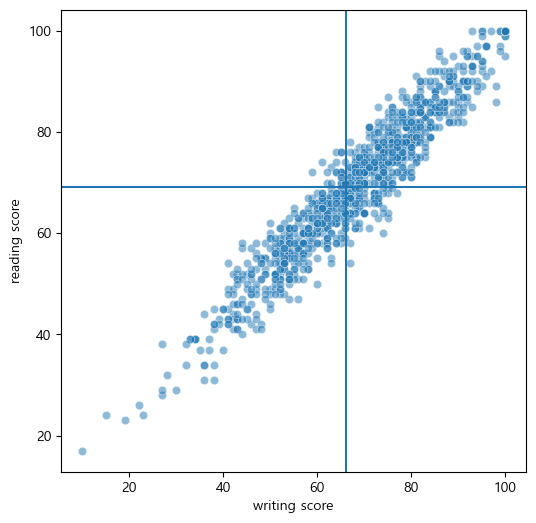

In [40]:
# seaborn으로 산점도 그리기
mean_f = df_sp['math score'].mean()
mean_s = df_sp['reading score'].mean()
print(mean_f, mean_s)

plt.figure(figsize=(6,6))

sns.scatterplot(data=df_sp, 
                x='writing score', 
                y='reading score',
                alpha=0.5)

plt.axhline(mean_s) # 수평선 추가
plt.axvline(mean_f) # 수직선 추가
plt.show()

In [39]:
df_sp[['math score','reading score', 'writing score']].corr('pearson')

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [ ]:
df_sp[['gender','reading score']].corr('pearson')
df_sp[['gender','math score']].corr('pearson')

In [33]:
sns.scatterplot(data=df_ins, 
                x='bmi', 
                y='charges', 
                alpha=0.2)

KeyError: 'Column not found: yes'

<br>


## 4. 그룹별 집계값의 계산과 분포 비교

범주형 변수를 그룹처럼 활용해서 그룹별 평균을 계산하고, 그룹별 상자그림을 그려서 그룹간 분포를 비교  
한 변수의 집계에서 `groupby()`를 추가하면 되고, 필요에 따라 `agg()`를 활용 가능 

In [42]:
# 그룹별 평균 계산
df_ins.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [43]:
# 여러개 그룹변수를 활용한 평균 계산
df_ins.groupby(['sex', 'smoker'], as_index=False)['charges'].mean()

,sex,smoker,charges
0,female,no,8762.297300
1,female,yes,30678.996276
2,male,no,8087.204731
3,male,yes,33042.005975


In [44]:
# 그룹별 여러 변수의 평균 계산 
df_ins.groupby('sex', as_index=False)[['charges', 'age']].mean()

,sex,charges,age
0,female,12569.578844,39.503021
1,male,13956.751178,38.917160


In [45]:
# 그룹별 한 변수의 여러 집계값 계산
df_ins.groupby('sex', as_index=False)['charges'].agg(['min','max','mean'])

,min,max,mean
sex,,,
female,1607.5101,63770.42801,12569.578844
male,1121.8739,62592.87309,13956.751178


In [46]:
# 일반적인 그룹별 집계값 계산
df_ins.groupby('sex', as_index=False).agg({'age':['min','max','mean'], 'charges':['mean', 'median']})

sex age                      charges            
          min max       mean          mean      median
0  female  18  64  39.503021  12569.578844  9412.96250
1    male  18  64  38.917160  13956.751178  9369.61575

<AxesSubplot:xlabel='charges', ylabel='Count'>

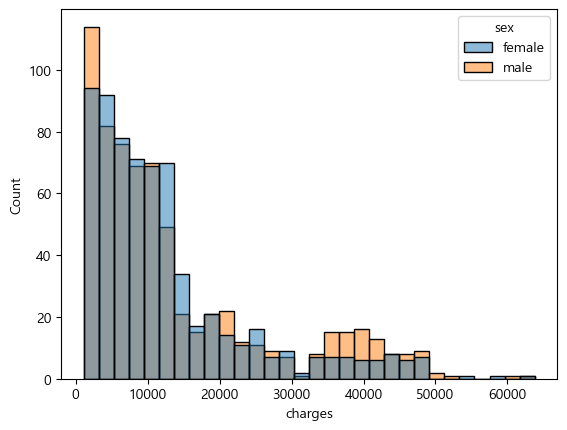

In [47]:
# 겹쳐그린 히스토그램 
sns.histplot(data=df_ins, 
             x = 'charges',
             hue='sex')

<AxesSubplot:xlabel='charges', ylabel='Count'>

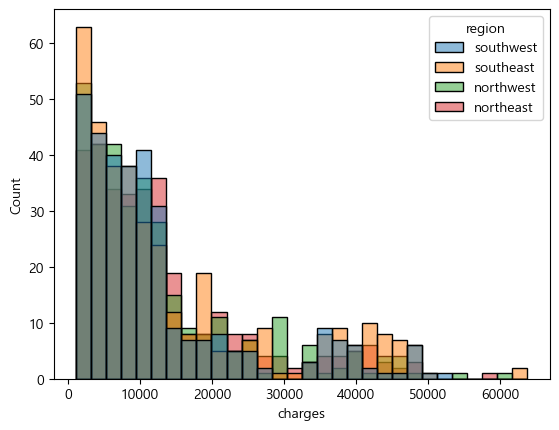

In [48]:
# 많이 겹치기 어려운 히스토그램
sns.histplot(data=df_ins, 
             x = 'charges',
             hue='region')

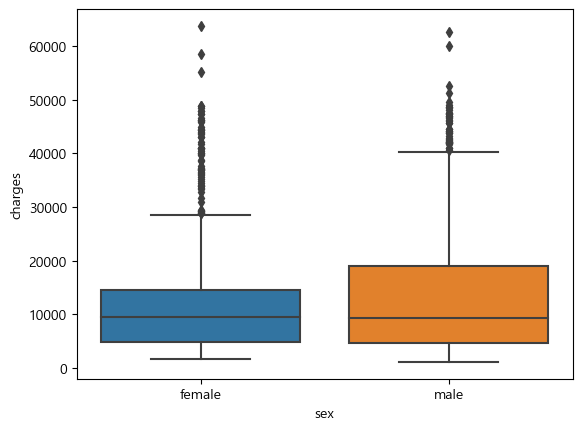

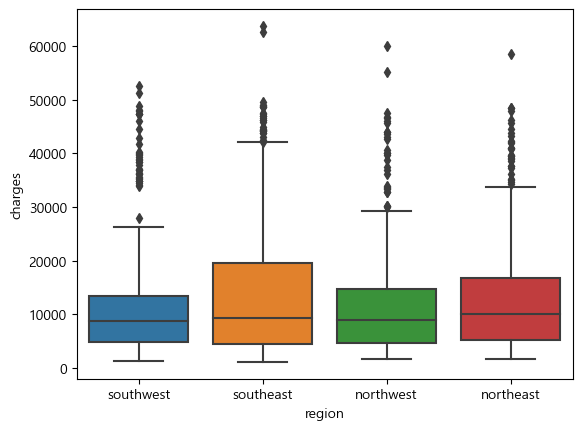

In [50]:
# 그룹별 상자그림 
sns.boxplot(data=df_ins,
            x='sex', 
            y='charges')
plt.show()

sns.boxplot(data=df_ins,
            x='region', 
            y='charges')
plt.show()

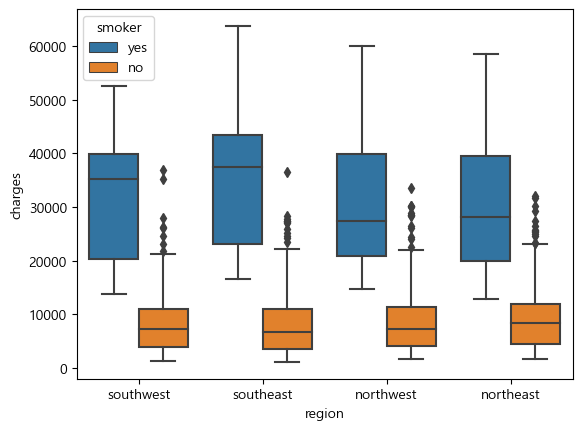

In [51]:
# hue를 추가로 활용한 상자그림
sns.boxplot(data=df_ins,
            x='region', 
            y='charges',
            hue='smoker')
plt.show()

#### [실습] 변수 관계 탐색

1. 데이터 df_sp에서 수치형 변수 하나와 범주형 변수 하나를 선택해서 그룹별 평균을 계산하고 상자그림 그리기
2. 데이터 df_sp에서 두 그룹 변수를 활용해서 `math score`의 평균을 계산하기
3. 2.의 세 변수를 x, y, hue로 활용해 seaborn으로 상자그림 그리기




In [52]:
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [56]:
df_sp.groupby(['parental level of education', 'test preparation course'], as_index=False).agg({'math score':['count', 'min','max','mean'], 'reading score':['min', 'max', 'mean']})

parental level of education test preparation course math score           \
                                                            count min  max   
0           associate's degree               completed         82  40  100   
1           associate's degree                    none        140  26  100   
2            bachelor's degree               completed         46  39  100   
3            bachelor's degree                    none         72  29  100   
4                  high school               completed         56  23   88   
5                  high school                    none        140   8   99   
6              master's degree               completed         20  46   94   
7              master's degree                    none         39  40   95   
8                 some college               completed         77  42  100   
9                 some college                    none        149  19  100   
10            some high school               completed         77  29   97   
11            some high school                    none        102   0   94   

              reading score                  
         mean           min  max       mean  
0   71.829268            43  100  76.170732  
1   65.571429            31  100  67.857143  
2   73.282609            42  100  76.739130  
3   66.902778            41  100  70.611111  
4   65.000000            41   99  67.839286  
5   60.992857            24   95  63.450000  
6   70.600000            42   99  78.250000  
7   69.307692            53  100  73.897436  
8   71.454545            47   97  75.987013  
9   64.892617            23  100  66.087248  
10  66.701299            37  100  70.948052  
11  61.078431            17   97  63.911765

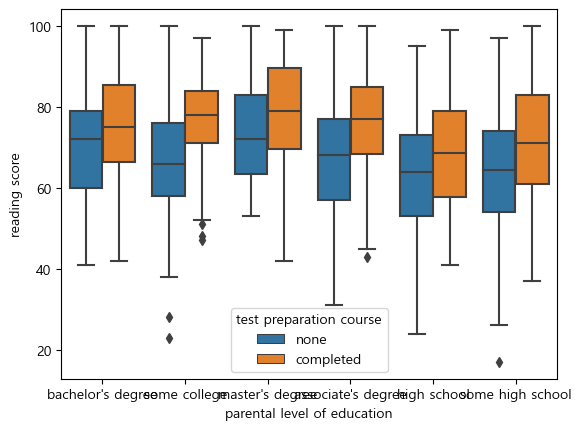

In [58]:
sns.boxplot(data=df_sp,
            x='parental level of education', 
            y='reading score',
            hue='test preparation course')
plt.show()

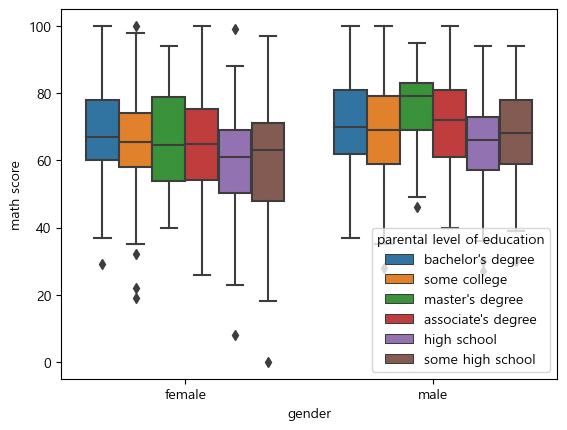

In [60]:
sns.boxplot(data=df_sp,
            x='gender', 
            y='math score',
            hue='parental level of education')
plt.show()

## 5. 표 형태 집계와 열지도

Excel의 피벗테이블과 같이 표 형태의 집계를 자주 활용  
`crosstab()`으로 교차표를 만들거나 `pivot_table()`로 피벗테이블을 만들고 활용


<br>

### 5.1. 교차표 생성과 열지도 그리기

한 범주형 변수의 관계를 확인할 때 개수를 센 것과 마찬가지로, 두 범주형 변수의 관계는 두 변수의 수준 조합별로 개수를 셈  
*crosstab( )*을 활용해서 교차표를 생성하고 표 형태의 결과 데이터를 **seaborn**의 *heatmap()*에 넣어서 열지도로 시각화  

In [61]:
# crosstab()을 활용한 교차표 생성
tab1 = pd.crosstab(df_ins['sex'], df_ins['smoker'])
tab1

smoker,no,yes
sex,,
female,547,115
male,517,159


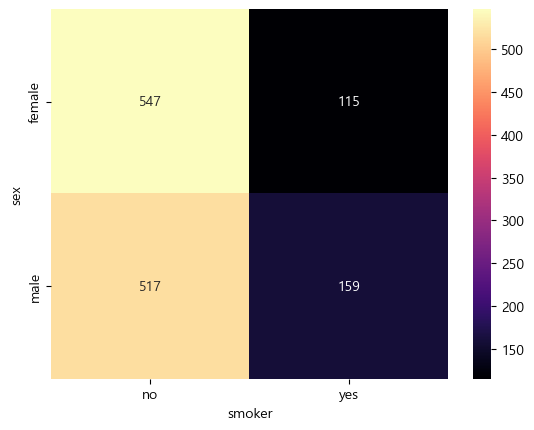

In [63]:
# 열지도 시각화
    # cmap : 색상 조합
    # annot=True : 수치 출력 여부
    # fmt : 수치 출력 형식, 'd' 정수, '.2f' 소수점 둘째자리 소수
sns.heatmap(tab1, cmap='magma', annot=True, fmt='d')
plt.show()

* 참고: [Color Palette](https://seaborn.pydata.org/tutorial/color_palettes.html)

<br>

*crosstab( )*에서 `margins=True` 옵션을 활용하면 행, 열 합계, 전체 합계 등을 한번에 계산할 수 있음

In [64]:
# crosstab()을 활용한 교차표 생성
tab1m = pd.crosstab(df_ins['sex'], df_ins['smoker'], margins=True)
tab1m

smoker,no,yes,All
sex,,,
female,547,115,662
male,517,159,676
All,1064,274,1338


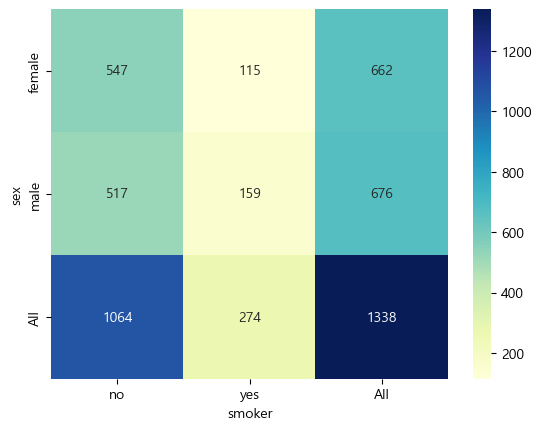

In [65]:
sns.heatmap(tab1m, cmap='YlGnBu', annot=True, fmt='d')
plt.show()

<br>

### 5.2. 행백분율과 열백분율의 계산과 열지도 그리기

두 변수의 관계를 제대로 파악하기 위해서는 상대적인 숫자 계산이 필수적  
`normalize=` 옵션을 활용해서 교차표에서 비율을 계산할 수 있음 

* `normalize='all'`: 전체 중 각 셀 비중
* `normalize='index'`: 행 백분율(행 합계 중 각 셀의 비중)
* `normalize='columns'`: 열 백분율(열 합계 중 각 셀의 비중)


<AxesSubplot:xlabel='smoker', ylabel='sex'>

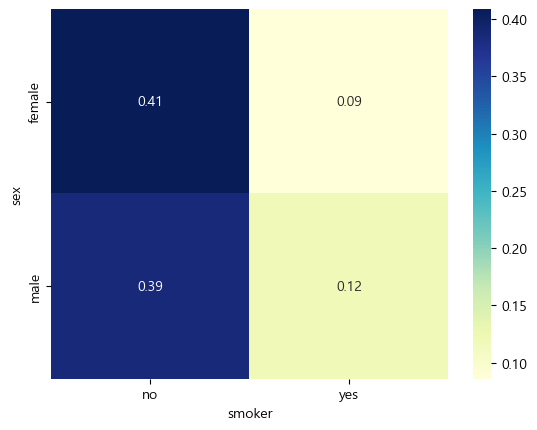

In [66]:
# 전체 백분율
    # normalize : '정규화'
tab1_all = pd.crosstab(df_ins['sex'], df_ins['smoker'], normalize='all')
sns.heatmap(tab1_all, cmap='YlGnBu', annot=True, fmt='.2f')

<AxesSubplot:xlabel='smoker', ylabel='sex'>

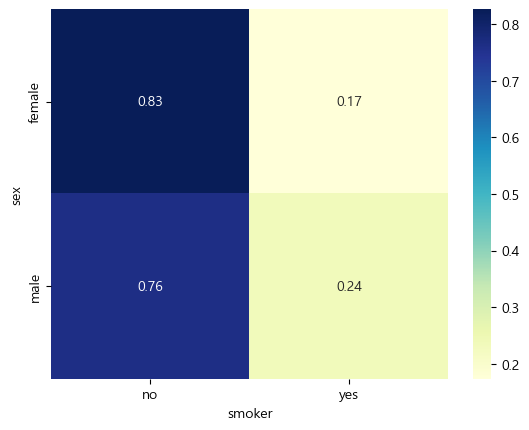

In [67]:
# 행백분율
    # normalize='index'
tab1_idx = pd.crosstab(df_ins['sex'], df_ins['smoker'], normalize='index')
tab1_idx
sns.heatmap(tab1_idx, cmap='YlGnBu', annot=True, fmt='.2f')

<AxesSubplot:xlabel='smoker', ylabel='sex'>

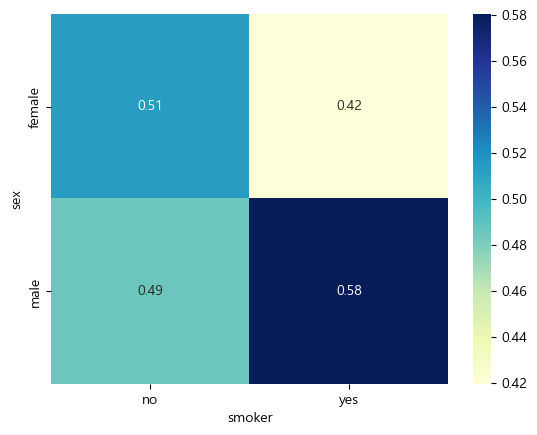

In [68]:
# 열백분율
    # normalize='index'
tab1_col = pd.crosstab(df_ins['sex'], df_ins['smoker'], normalize='columns')
tab1_col
sns.heatmap(tab1_col, cmap='YlGnBu', annot=True, fmt='.2f')

<AxesSubplot:xlabel='smoker', ylabel='sex'>

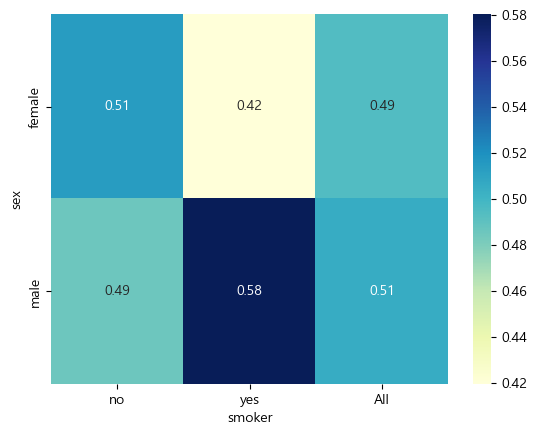

In [69]:
# 전체 비율을 추가한 열백분율
    # margins=True
tab1_col = pd.crosstab(df_ins['sex'], df_ins['smoker'], normalize='columns', margins=True)
tab1_col
sns.heatmap(tab1_col, cmap='YlGnBu', annot=True, fmt='.2f')

#### [실습] 두 범주형 변수의 관계 탐색

1. df_sp에서 'race/ethnicity'와 'parental level of education'의 교차표 만들기
2. 1.의 교차표에 margin 추가하기
3. 1.의 교차표를 seaborn의 heatmap( )으로 열지도로 시각화하기
4. 2.의 교차표에서 행 백분율, 열 백분율 계산하고 시각화 하기
5. 'race/ethnicity'와 'parental level of education'의 관계 해석하기

In [ ]:
df_sp.head()

In [70]:
tab1m = pd.crosstab(df_sp['race/ethnicity'], df_sp['parental level of education'], margins=True)
tab1m

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,All
race/ethnicity,,,,,,,
group A,14,12,18,3,18,24,89
group B,41,20,48,6,37,38,190
group C,78,40,64,19,69,49,319
group D,50,28,44,23,67,50,262
group E,39,18,22,8,35,18,140
All,222,118,196,59,226,179,1000


<AxesSubplot:xlabel='parental level of education', ylabel='race/ethnicity'>

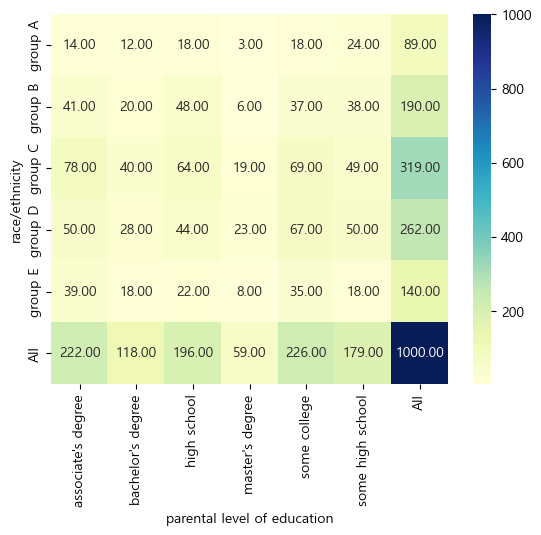

In [71]:
sns.heatmap(tab1m, cmap='YlGnBu', annot=True, fmt='.2f')

<AxesSubplot:xlabel='parental level of education', ylabel='race/ethnicity'>

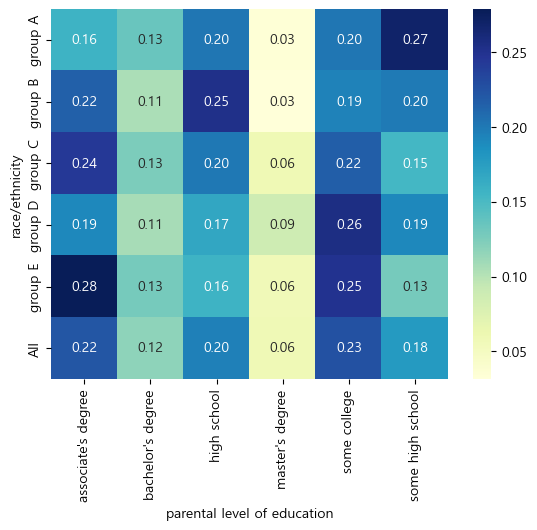

In [72]:
tab1m = pd.crosstab(df_sp['race/ethnicity'], df_sp['parental level of education'], normalize='index', margins=True)
sns.heatmap(tab1m, cmap='YlGnBu', annot=True, fmt='.2f')

### 5.3. 피벗테이블 생성 

pandas의 *pivot_table()*을 활용하면 Excel의 피벗테이블과 동일한 표 형태의 집계 가능

In [73]:
# pivot_table()을 활용한 교차표 작성
    ## index  : 행 그룹변수
    ## columns: 열 그룹변수 
    ## values : 값 변수
    ## aggfunc: 집계 함수
pd.pivot_table(df_ins, index='sex', columns='region', values='charges', aggfunc='size')

region,northeast,northwest,southeast,southwest
sex,,,,
female,161,164,175,162
male,163,161,189,163


In [74]:
# pivot_table()을 활용한 평균 피벗테이블
pd.pivot_table(df_ins, index='sex', columns='region', values='charges', aggfunc='mean')

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.203151,12479.870397,13499.669243,11274.411264
male,13854.005374,12354.119575,15879.617173,13412.883576


In [75]:
# DataFrmae의 method, pivot_table()을 활용한 평균 피벗테이블
agg2_wide = df_ins.pivot_table(index='sex', columns='region', values='charges', aggfunc='mean')
agg2_wide

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.203151,12479.870397,13499.669243,11274.411264
male,13854.005374,12354.119575,15879.617173,13412.883576


<AxesSubplot:xlabel='region', ylabel='sex'>

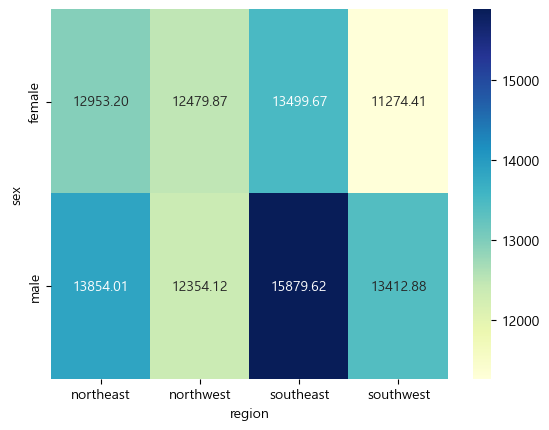

In [76]:
# 열지도 시각화
sns.heatmap(agg2_wide, cmap='YlGnBu', annot=True, fmt='.2f')

<br>

#### [실습] df_sp 활용

1. 'race/ethnicity', 'parental level of education'별 'math score'의 평균을 피벗테이블로 계산
2. 1.의 결과를 열지도로 시각화

In [ ]:
df_sp.head()

In [77]:
agg_sp = df_sp.pivot_table(index='race/ethnicity', columns='parental level of education', values='math score', aggfunc='mean')
agg_sp

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
race/ethnicity,,,,,,
group A,61.000000,67.166667,60.444444,57.666667,63.888889,58.916667
group B,66.097561,69.300000,59.791667,67.166667,63.189189,61.815789
group C,66.730769,68.150000,60.906250,67.052632,65.130435,60.551020
group D,67.600000,67.571429,62.863636,72.521739,68.731343,66.760000
group E,74.897436,76.555556,70.772727,74.625000,73.828571,72.111111


<AxesSubplot:xlabel='parental level of education', ylabel='race/ethnicity'>

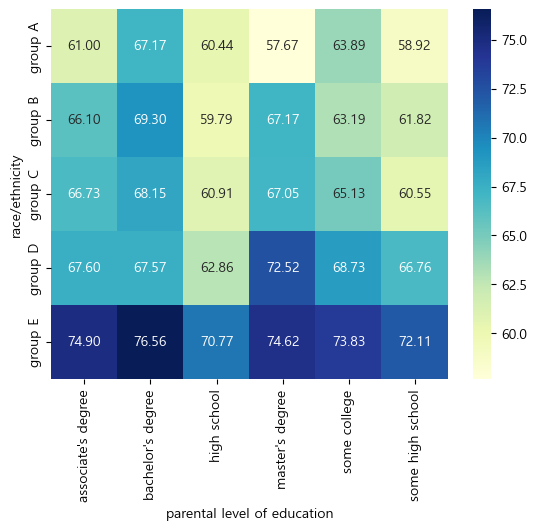

In [79]:
sns.heatmap(agg_sp, cmap='YlGnBu', annot=True, fmt='.2f')

### 5.4. 형태 변환

상황에 따라 *groupby()*를 써서 아래로 길게 늘어뜨린 요약 결과를 만들 수도 있고, *crosstab()*나 *pivot_table()*처럼 옆으로 펼친 결과를 만들기도 함  

두 데이터 형태는 각각 *pivot( )*과 *melt( )*로 전환 가능



In [80]:
# groupby()로 아래로 늘어뜨린 요약 결과 생성
agg2_long = df_ins.groupby(['sex','region'], as_index=False)['charges'].mean()
agg2_long

,sex,region,charges
0,female,northeast,12953.203151
1,female,northwest,12479.870397
2,female,southeast,13499.669243
3,female,southwest,11274.411264
4,male,northeast,13854.005374
5,male,northwest,12354.119575
6,male,southeast,15879.617173
7,male,southwest,13412.883576


In [81]:
# DataFrmae의 method, pivot_table()을 활용한 평균 피벗테이블
agg2_wide = df_ins.pivot_table(index='sex', columns='region', values='charges', aggfunc='mean')
agg2_wide

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.203151,12479.870397,13499.669243,11274.411264
male,13854.005374,12354.119575,15879.617173,13412.883576


In [ ]:
# 형태에 따른 그래프 작성 차이
import matplotlib.pyplot as plt
import seaborn as sns

# long -> 막대그래프
sns.barplot(data=agg2_long,
            x  ='region',
            y  ='charges',
            hue='sex')
plt.show()


# wide -> 열지도
sns.heatmap(agg2_wide, cmap='YlGnBu')
plt.show()


In [ ]:
# pivot()을 활용한 long -> wide 변환
#pd.pivot(agg2_long, index='sex', columns='region', values='charges')

agg2_long.pivot(index='sex', columns='region', values='charges')

In [ ]:
# melt()를 활용한 wide-> long 변환
    # 먼저 index를 변수로 변환
agg2_wide.reset_index()

In [ ]:
pd.melt(agg2_wide.reset_index(), id_vars='sex')

In [ ]:
pd.melt(agg2_wide.reset_index(), id_vars='sex', value_name='charges')

<br>

#### [실습] 데이터 df_sp 활용

1. groupby()를 활용해서 'race/ethnicity', 'parental level of education'별 'writing score'의 중앙값 계산하고 저장하기

2. pivot_table()를 활용해서 'race/ethnicity', 'parental level of education'별 'writing score'의 중앙값 계산하고 저장하기

3. 1.의 결과를 pivot()을 활용해서 2.와 동일하게 변환하기

4. 2.의 결과를 melt()를 활용해서 1.과 동일하게 만들기

5. 3.의 결과를 seaborn의 heatmap()으로 시각화하기




In [ ]:
df_sp.head()

In [ ]:
agg2_long = df_sp.groupby(['race/ethnicity','parental level of education'], as_index=False)['writing score'].median()
agg2_long

In [92]:
agg2_wide = df_sp.pivot_table(index='race/ethnicity', columns='parental level of education', values='writing score', aggfunc='median')

In [90]:
agg2_long.pivot(index='race/ethnicity', columns='parental level of education', values='writing score')

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
race/ethnicity,,,,,,
group A,58.5,64.5,62.5,72.0,67.0,55.5
group B,68.0,75.0,62.5,81.0,66.0,67.0
group C,70.0,77.0,63.5,71.0,70.0,63.0
group D,73.0,74.0,66.0,78.0,73.0,70.5
group E,74.0,71.5,71.0,85.5,71.0,76.0


In [93]:
pd.melt(agg2_wide.reset_index(), id_vars='race/ethnicity', value_name='writing score')

,race/ethnicity,parental level of education,writing score
0,group A,associate's degree,58.5
1,group B,associate's degree,68.0
2,group C,associate's degree,70.0
3,group D,associate's degree,73.0
4,group E,associate's degree,74.0
5,group A,bachelor's degree,64.5
6,group B,bachelor's degree,75.0
7,group C,bachelor's degree,77.0
8,group D,bachelor's degree,74.0
9,group E,bachelor's degree,71.5


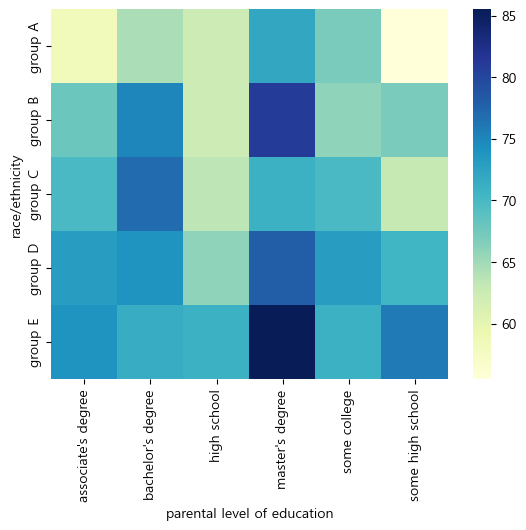

In [94]:
sns.heatmap(agg2_wide, cmap='YlGnBu')
plt.show()

<br>


## 6. 데이터 집계와 데이터 처리 

데이터 집계를 통해 얻은 정보를 다양한 방법으로 데이터 처리에 활용 가능  
가장 대표적인 방법은 데이터 집계를 통해 관심 대상을 확인하고 선택하는 방법

In [ ]:
# 집계값의 계산
agg2 = df_ins.groupby('region', as_index=False)['charges'].median()

In [ ]:
# 상위 2개 지역 선택
target_region = agg2.nlargest(2, 'charges')['region']

In [ ]:
# 전체 관측치에서 .isin()을 활용하여 해당 지역 관측치만 선택
cond = df_ins['region'].isin(target_region)

In [99]:
df_ins[cond]

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
8,37,male,29.830,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1327,51,male,30.030,1,no,southeast,9377.90470
1328,23,female,24.225,2,no,northeast,22395.74424
1330,57,female,25.740,2,no,southeast,12629.16560
1334,18,female,31.920,0,no,northeast,2205.98080


<br>

#### [실습] df_sp 활용

1. 'parental level of education'별 'reading score'의 평균을 계산하고 **df_agg**로 저장하기
2. 1.의 **df_agg**에서 평균 점수 기준 상위 3개 관측치를 선택하고 변수 'parental level of education' 선택해서 **target_grp**로 저장하기
3. 2.의 **target_grp**와 *isin()*을 활용하여 전체 데이터 **df_sp**에서 해당 그룹 관측치(행)을 선택하고 **df_sub**로 저장하기
4. 3.의 **df_sub**를 활용하여 'race/ethnicity'별 'writing score'의 평균 계산

In [100]:
df_agg = df_sp.groupby('parental level of education', as_index=False)['reading score'].mean()
df_agg

,parental level of education,reading score
0,associate's degree,70.927928
1,bachelor's degree,73.000000
2,high school,64.704082
3,master's degree,75.372881
4,some college,69.460177
5,some high school,66.938547


In [101]:
target_grp = df_agg.nlargest(3, 'reading score')['parental level of education']
target_grp

3       master's degree
1     bachelor's degree
0    associate's degree
Name: parental level of education, dtype: object

In [103]:
cond = df_sp['parental level of education'].isin(target_grp)
df_sub = df_sp[cond]

In [105]:
df_sub.groupby('race/ethnicity', as_index=False)['writing score'].mean()

,race/ethnicity,writing score
0,group A,65.965517
1,group B,70.059701
2,group C,71.810219
3,group D,72.673267
4,group E,74.707692


<br>

## 7. 결과 데이터와 그래프의 저장

함수를 활용해서 분석 결과 데이터와 그래프를 저장 가능

In [106]:
# 폴더 생성
%mkdir result

하위 디렉터리 또는 파일 result이(가) 이미 있습니다.


In [107]:
# 대상 결과 데이터 확인
agg2

,region,charges
0,northeast,10057.652025
1,northwest,8965.795750
2,southeast,9294.131950
3,southwest,8798.593000


In [108]:
# to_csv()로 결과 데이터를 csv 형식으로 저장하기
agg2.to_csv('result/result.csv', index=True)

<AxesSubplot:xlabel='smoker', ylabel='region'>

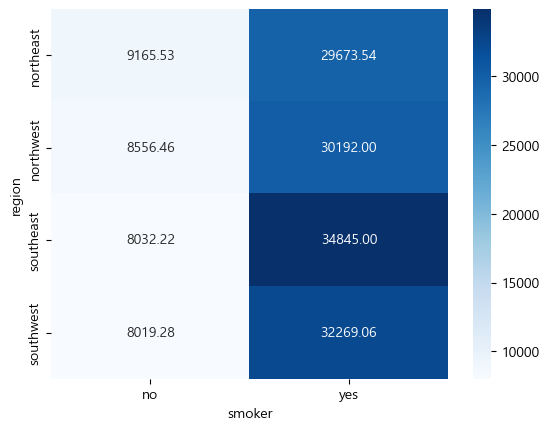

In [109]:
# 대상 그래프 확인
pt1 = df_ins.pivot_table(index='region', columns='smoker', values='charges', aggfunc='mean')
plot1 = sns.heatmap(pt1, cmap='Blues', annot=True, fmt='.2f')
plot1

In [110]:
# savefig()을 활용한 그래프 저장
plot1.figure.savefig('result/plot1.jpg')

<br>
<hr>
<br>

## 8. 반응형 그래프의 활용

**plotly**를 활용해서 반응형 그래프를 그려서 탐색적 데이터 분석(EDA) 과정에서 유용하게 활용 가능

* 참고: [Plotly](https://plotly.com/python/)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

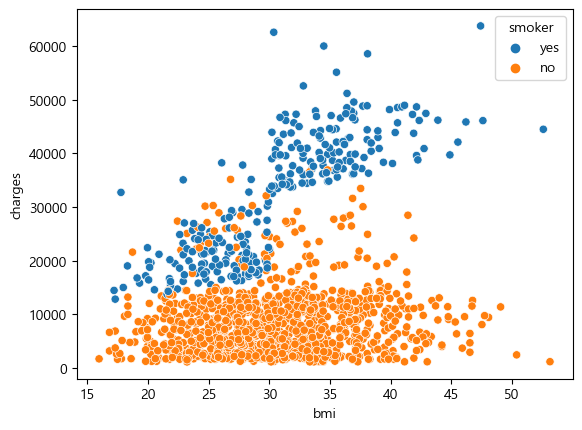

In [113]:
# seaborn을 활용한 산점도 
sns.scatterplot(data=df_ins, 
                x='bmi',
                y='charges',
                hue='smoker')

In [114]:
#import plotly.offline as pyo
#pyo.init_notebook_mode()


import plotly.express as px
px.scatter(df_ins,
           x='bmi',
           y='charges', 
           color='smoker')

#### [실습]
1. df_sp에서 `parental level of education`별로 색을 다르게 한  `math score`와 `reading score`의 산점도 그리기 

<AxesSubplot:xlabel='math score', ylabel='reading score'>

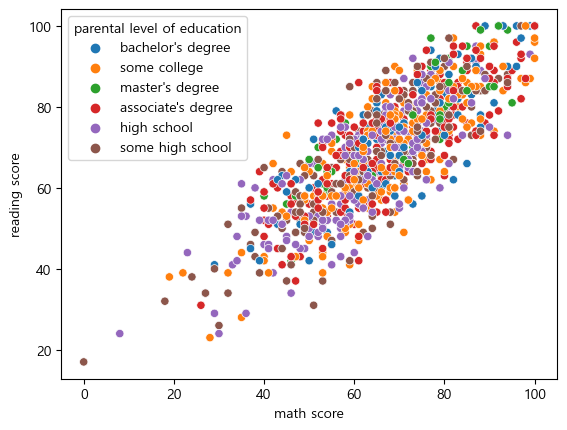

In [115]:
sns.scatterplot(data=df_sp, 
                x='math score',
                y='reading score', 
                hue='parental level of education')

In [116]:
px.scatter(df_sp, 
                x='math score',
                y='reading score', 
                color='parental level of education')

#### End of script